In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from utils import *

pd.set_option('display.max_columns', None)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/keremgura/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/keremgura/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/keremgura/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/keremgura/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.st

AttributeError: _ARRAY_API not found

In [2]:
DATA_PATH = '../../data/networks/match_952209/'
XT_PLOT_PATH = '../../data/smoothed_xt.csv'
"""
WYSCOUT_PATH = DATA_PATH + 'wyscout/'
SKILLCORNER_PATH = DATA_PATH + 'skillcorner/'
SKILLCORNER_RAW_PATH = DATA_PATH + 'skillcorner_raw/'
XT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'
MATCH_IDS_PATH = DATA_PATH + 'matchids.csv'
WYSCOUT_TO_SKILLCORNER = DATA_PATH + 'wyscout2skillcorner.csv'
"""

"\nWYSCOUT_PATH = DATA_PATH + 'wyscout/'\nSKILLCORNER_PATH = DATA_PATH + 'skillcorner/'\nSKILLCORNER_RAW_PATH = DATA_PATH + 'skillcorner_raw/'\nXT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'\nMATCH_IDS_PATH = DATA_PATH + 'matchids.csv'\nWYSCOUT_TO_SKILLCORNER = DATA_PATH + 'wyscout2skillcorner.csv'\n"

In [3]:
passes_network = pd.read_csv(DATA_PATH + 'passes_network.csv')

In [4]:
passes_network.sort_values(by = 'dxt', ascending= False)

,Unnamed: 0,player.id.skillcorner,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,dxt,responsibility,match.period,team.name
813,813,33512,3837,-45.625000,-16.493333,-47.000000,1.409231,0.126503,4.162870,1,Netherland
561,561,12190,5922,47.916667,12.826667,47.916667,0.000000,0.126292,2.562231,1,France
586,586,12218,11516,26.470588,20.160000,48.833333,-12.215556,0.076054,3.120489,1,France
797,797,31930,7387,-41.500000,-10.993333,-45.625000,-2.113846,0.075595,1.018979,1,Netherland
523,523,11606,16320,34.941176,24.530526,41.500000,5.636923,0.072271,2.259881,1,France
...,...,...,...,...,...,...,...,...,...,...,...
528,528,11630,277,42.875000,-29.629474,28.588235,-27.444211,-0.021768,1.539256,1,France
136,136,6028,277,-32.823529,-17.715556,-21.176471,-16.493333,-0.023043,2.680899,2,France
28,28,277,16320,23.294118,-12.826667,-2.117647,-17.715556,-0.025133,0.309937,1,France
165,165,7017,4777,-24.352941,19.548889,14.823529,22.345263,-0.028339,0.833269,1,Netherland


In [5]:
xt_table = pd.read_csv(XT_PLOT_PATH)
xt_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,0.000635,0.000676,0.000738,0.000803,0.000857,0.000899,0.000930,0.000952,0.000966,0.000976,0.000983,0.000991,0.001001,0.001018,0.001041,0.001074,0.001114,0.001160,0.001211,0.001262,0.001311,0.001357,0.001399,0.001439,0.001479,0.001522,0.001572,0.001633,0.001708,0.001798,0.001904,0.002026,0.002162,0.002311,0.002471,0.002640,0.002817,0.002996,0.003177,0.003354,0.003524,0.003684,0.003834,0.003975,0.004112,0.004254,0.004409,0.004588,0.004800,0.005050,0.005341,0.005671,0.006034,0.006423,0.006830,0.007249,0.007676,0.008112,0.008561,0.009032,0.009535,0.010081,0.010679,0.011336,0.012052,0.012825,0.013648,0.014511,0.015407,0.016328,0.017269,0.018230,0.019216,0.020235,0.021295,0.022406,0.023574,0.024804,0.026095,0.027440,0.028831,0.030256,0.031705,0.033166,0.034628,0.036078,0.037508,0.038906,0.040262,0.041569,0.042825,0.044042,0.045245,0.046475,0.047782,0.049218,0.050839,0.052700,0.054856,0.057363,0.060270,0.063590,0.067176,0.070499,0.120000
1,0.000626,0.000662,0.000717,0.000775,0.000825,0.000865,0.000897,0.000921,0.000939,0.000954,0.000967,0.000981,0.000997,0.001018,0.001045,0.001079,0.001119,0.001165,0.001214,0.001263,0.001311,0.001357,0.001400,0.001441,0.001483,0.001528,0.001580,0.001642,0.001716,0.001805,0.001909,0.002029,0.002164,0.002313,0.002475,0.002650,0.002834,0.003024,0.003216,0.003406,0.003588,0.003759,0.003916,0.004063,0.004203,0.004347,0.004505,0.004686,0.004902,0.005159,0.005459,0.005800,0.006175,0.006576,0.006994,0.007420,0.007851,0.008286,0.008731,0.009197,0.009694,0.010235,0.010829,0.011484,0.012203,0.012980,0.013810,0.014682,0.015588,0.016518,0.017468,0.018438,0.019433,0.020459,0.021528,0.022647,0.023825,0.025066,0.026369,0.027728,0.029132,0.030572,0.032035,0.033509,0.034986,0.036457,0.037916,0.039360,0.040783,0.042184,0.043563,0.044930,0.046301,0.047703,0.049166,0.050723,0.052408,0.054256,0.056301,0.058577,0.061113,0.063911,0.066852,0.069527,0.071196
2,0.000615,0.000643,0.000687,0.000734,0.000777,0.000815,0.000847,0.000875,0.000900,0.000922,0.000944,0.000966,0.000991,0.001018,0.001050,0.001087,0.001128,0.001172,0.001219,0.001267,0.001314,0.001359,0.001404,0.001448,0.001493,0.001542,0.001597,0.001661,0.001735,0.001822,0.001924,0.002040,0.002172,0.002321,0.002487,0.002668,0.002864,0.003069,0.003278,0.003486,0.003686,0.003872,0.004043,0.004198,0.004345,0.004494,0.004655,0.004842,0.005065,0.005333,0.005648,0.006006,0.006399,0.006817,0.007250,0.007687,0.008124,0.008559,0.009001,0.009460,0.009948,0.010481,0.011070,0.011725,0.012446,0.013231,0.014071,0.014957,0.015877,0.016823,0.017789,0.018775,0.019785,0.020829,0.021915,0.023054,0.024255,0.025521,0.026852,0.028240,0.029675,0.031144,0.032636,0.034138,0.035643,0.037149,0.038656,0.040168,0.041692,0.043233,0.044796,0.046387,0.048010,0.049669,0.051369,0.053113,0.054903,0.056745,0.058640,0.060592,0.062601,0.064652,0.066667,0.068408,0.069463
3,0.000606,0.000627,0.000660,0.000697,0.000734,0.000769,0.000802,0.000833,0.000863,0.000893,0.000923,0.000954,0.000986,0.001020,0.001057,0.001096,0.001137,0.001181,0.001226,0.001273,0.001319,0.001366,0.001413,0.001461,0.001512,0.001566,0.001625,0.001692,0.001767,0.001853,0.001951,0.002064,0.002194,0.002341,0.002508,0.002695,0.002900,0.003118,0.003343,0.003568,0.003784,0.003986,0.004170,0.004337,0.004493,0.004648,0.004817,0.005012,0.005245,0.005525,0.005855,0.006229,0.006639,0.007074,0.007521,0.007969,0.008412,0.008849,0.009289,0.009743,0.010226,0.010754,0.011340,0.011994,0.012719,0.013511,0.014362,0.015261,0.016197,0.017161,0.018146,0.019153,0.020186,0.021255,0.022370,0.023543,0.024781,0.026089,0.027465,0.028901,0.030384,0.031901,0.033436,0.034980,0.036524,0.038071,0.039629,0.041212,0.042834,0.044509,0.046247,0.048052,0.049917,0.051826,

In [6]:
single_row = passes_network[passes_network[passes_network.columns[0]] == 586].iloc[0]

In [7]:
df = pd.DataFrame([single_row] * 105 * 4 * 68 * 4)
df

,Unnamed: 0,player.id.skillcorner,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,dxt,responsibility,match.period,team.name
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,3.120489,1,France
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,3.120489,1,France
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,3.120489,1,France
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,3.120489,1,France
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,3.120489,1,France
...,...,...,...,...,...,...,...,...,...,...,...
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,3.120489,1,France
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,3.120489,1,France
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,3.120489,1,France
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,3.120489,1,France


In [8]:
# Define the range for x and y values around the locations
"""
range_ = 10
range_start_x = single_row['location.x'] - range_
range_end_x = single_row['pass.endLocation.x'] + range_
range_start_y = single_row['location.y'] + range_
range_end_y = single_row['pass.endLocation.y'] - range_

# Define the number of points along each axis
num_points_x = 50  # Adjust for desired resolution in x direction
num_points_y = 50  # Adjust for desired resolution in y direction

# Create linearly spaced values across x and y range
x_values = np.linspace(range_start_x, range_end_x, num_points_x)
y_values = np.linspace(range_start_y, range_end_y, num_points_y)
"""
num_points_x = 105*4  # Adjust for desired resolution in x direction
num_points_y = 68*4  # Adjust for desired resolution in y direction

# Create linearly spaced values across x and y range
x_values = np.linspace(-52.5, 52.5, num_points_x)
y_values = np.linspace(-34, 34, num_points_y)

# Create a grid of all combinations of x and y values
grid_x, grid_y = np.meshgrid(x_values, y_values)

# Flatten the grid to create a single list of x and y values for each point in the grid

df['tracking.x'] = grid_x.flatten()
df['tracking.y'] = grid_y.flatten()


In [9]:
df.to_csv('grid_around_pass.csv')

In [10]:
import utils

In [11]:
def responsibility(row, ball_speed=12.0, defender_speed=6.0):
    start_x = row['location.x']
    start_y = row['location.y']
    end_x = row['pass.endLocation.x']
    end_y = row['pass.endLocation.y']
    player_x = row['tracking.x']
    player_y = row['tracking.y']
    
    # Vector from start to end of the pass
    pass_vector = np.array([end_x - start_x, end_y - start_y])
    pass_length = np.linalg.norm(pass_vector)
    
    if pass_length == 0:
        return 0  # No pass, no responsibility
    
    # Unit vector along the pass trajectory
    pass_unit_vector = pass_vector / pass_length

    # Time for the ball to travel the length of the pass
    ball_time = pass_length / ball_speed

    # Maximum distance the defender can travel in the same time
    max_defender_distance = defender_speed * ball_time

    # Width of the triangle at the far end (cone edge)
    max_width = 2 * max_defender_distance

    # Find the projection of the player onto the pass vector
    player_vector = np.array([player_x - start_x, player_y - start_y])
    projection_length = np.dot(player_vector, pass_unit_vector)
    
    # Clamp the projection length to the range [0, pass_length]
    projection_length = max(0, min(projection_length, pass_length))

    # Find the closest point on the pass trajectory
    closest_point = np.array([start_x, start_y]) + projection_length * pass_unit_vector

    # Perpendicular distance from the defender to the pass trajectory
    perpendicular_distance = np.linalg.norm(np.array([player_x, player_y]) - closest_point)

    # Calculate the triangle width at the defender's projection point
    triangle_width_at_point = max_width * (projection_length / pass_length)

    # Determine if the player is inside the interceptability region
    if perpendicular_distance <= triangle_width_at_point / 2:
        # Calculate responsibility based on perpendicular distance
        responsibility_score = 1 - (perpendicular_distance / (triangle_width_at_point / 2))
    else:
        # Player is outside the triangle
        responsibility_score = 0

    return responsibility_score

In [12]:
df['tracking.object_id'] = 1
df['responsibility'] = df.apply(responsibility, axis=1)
df

,Unnamed: 0,player.id.skillcorner,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,dxt,responsibility,match.period,team.name,tracking.x,tracking.y,tracking.object_id
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,0.0,1,France,-52.500000,-34.0,1
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,0.0,1,France,-52.249403,-34.0,1
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,0.0,1,France,-51.998807,-34.0,1
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,0.0,1,France,-51.748210,-34.0,1
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,0.0,1,France,-51.497613,-34.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,0.0,1,France,51.497613,34.0,1
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,0.0,1,France,51.748210,34.0,1
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,0.0,1,France,51.998807,34.0,1
586,586,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,0.0,1,France,52.249403,34.0,1


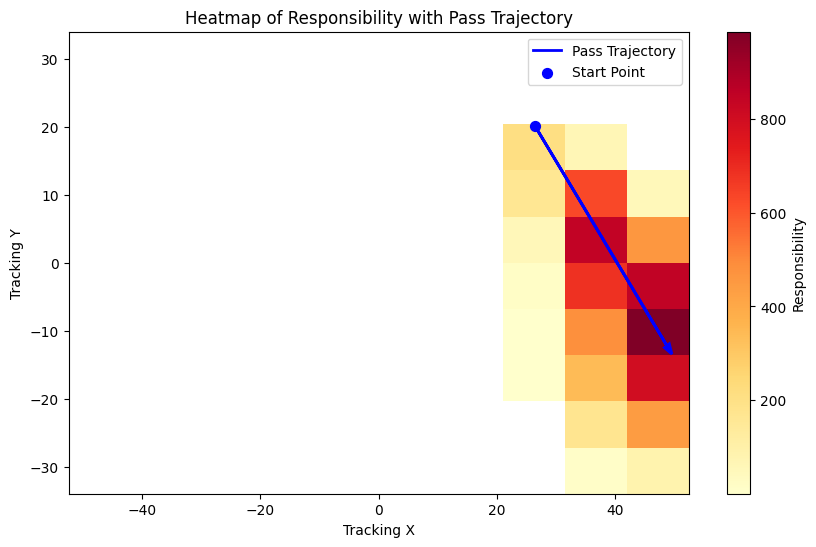

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a 2D histogram heatmap for the responsibility based on tracking.x and tracking.y
# Heatmap using a 2D histogram of tracking.x, tracking.y with responsibility as weights
plt.figure(figsize=(10, 6))

plt.hist2d(df['tracking.x'], df['tracking.y'], weights=df['responsibility'], density= False,
           cmap='YlOrRd', cmin=0.001)
plt.colorbar(label='Responsibility')

# Starting and ending points of the pass
start_x, start_y = df['location.x'].iloc[0], df['location.y'].iloc[0]
end_x, end_y = df['pass.endLocation.x'].iloc[0], df['pass.endLocation.y'].iloc[0]

# Overlay the pass trajectory with an arrow
plt.plot([start_x, end_x], [start_y, end_y], color='blue', linestyle='-', linewidth=2, label='Pass Trajectory')
plt.scatter([start_x], [start_y], color='blue', s=50, label='Start Point')  # Mark the start point

# Add an arrow to indicate direction
plt.arrow(start_x, start_y, end_x - start_x, end_y - start_y, 
          head_width=1, head_length=1.5, fc='blue', ec='blue', linewidth=2)
"""
# Overlay the pass trajectory
plt.plot([df['location.x'].iloc[0], df['pass.endLocation.x'].iloc[0]],
         [df['location.y'].iloc[0], df['pass.endLocation.y'].iloc[0]],
         color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Pass Trajectory')"""
"""
plt.xlim(min(single_row['location.x'], single_row['pass.endLocation.x']) - range_,
         max(single_row['location.x'], single_row['pass.endLocation.x']) + range_)
plt.ylim(min(single_row['location.y'], single_row['pass.endLocation.y']) - range_,
         max(single_row['location.y'], single_row['pass.endLocation.y']) + range_)
"""
# Customize the plot
plt.title("Heatmap of Responsibility with Pass Trajectory")
plt.xlabel("Tracking X")
plt.ylabel("Tracking Y")
plt.legend()

plt.show()